# INTRODUÇÃO
Os produtores e comerciantes de commodities agrícolas, soja, vêem as oscilações dos preços e várias vezes explicam que o preço da soja depende da cotação do dólar, ou seja "_o preço da soja sobe ou desce pro causa do dólar_".

Neste código realizaremos a construção de gráficos de correlação para observarmos se realmente existe um movimento conjunto dos preços.

Utilizaremos dados do indicador da soja Esalq/BM&F Bovespa - Paranaguá, divulgado pelo [CEPEA - Centro de Estudos Avançados em Economia Aplicada](https://www.cepea.esalq.usp.br/br). Os dados importados receberam um tratamento inicial no Excel.

## 1.Importando as Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2.Importando os Dados

In [ ]:
soja = pd.read_csv('2006_03_13_soja_cepea_2022_04_08.csv', sep=';', header=1, encoding='unicode_escape')

## 3.Visualizando os Dados

Visualizando as primeiras linhas da tabela de dados. Inicialmente esta tudo correto.

In [ ]:
soja.head()

,Data,À vista R$,À vista US$
0,13/03/2006,"27,66","12,96"
1,14/03/2006,"27,45","12,91"
2,15/03/2006,"27,58",13
3,16/03/2006,"26,97","12,78"
4,17/03/2006,"26,96","12,68"


Vamos então visualizar o tipo de dados que importamos. Ou seja, são dados númericos, categóricos ou outro?

In [ ]:
soja.dtypes

Data           object
À vista R$     object
À vista US$    object
dtype: object

Também podemos ver a quantidade de dados.

In [ ]:
soja.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4007 entries, 0 to 4006
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Data         4007 non-null   object
 1   À vista R$   4007 non-null   object
 2   À vista US$  4007 non-null   object
dtypes: object(3)
memory usage: 94.0+ KB


## 4.Transformação dos Dados

In [ ]:
# Renomeando as colunas:
soja.rename(columns={'À vista R$': 'Soja_R$', 'À vista US$': 'Soja_US$'}, inplace = True)

# Transformando a coluna de Datas em indice:
soja.set_index('Data', inplace = True)
soja.index = pd.DatetimeIndex(soja.index, dayfirst = True)

# Transformando as colunas númericas:
soja['Soja_R$'] = soja['Soja_R$'].str.replace(',', '.').astype(float)
soja['Soja_US$'] = soja['Soja_US$'].str.replace(',', '.').astype(float)

## 5.Criando novas Variáveis

In [ ]:
soja['Dolar_R$'] = round(soja['Soja_R$'] / soja['Soja_US$'], 2)

## 6.Definindo Período
Vamos utilizar do ano de 2017 até os dias atuais.

In [ ]:
soja_5y = soja['20170101':]

## 7.Gráficos

### 7.1 Gráfico de Linhas
Visualizando a tendência dos preços individuais.

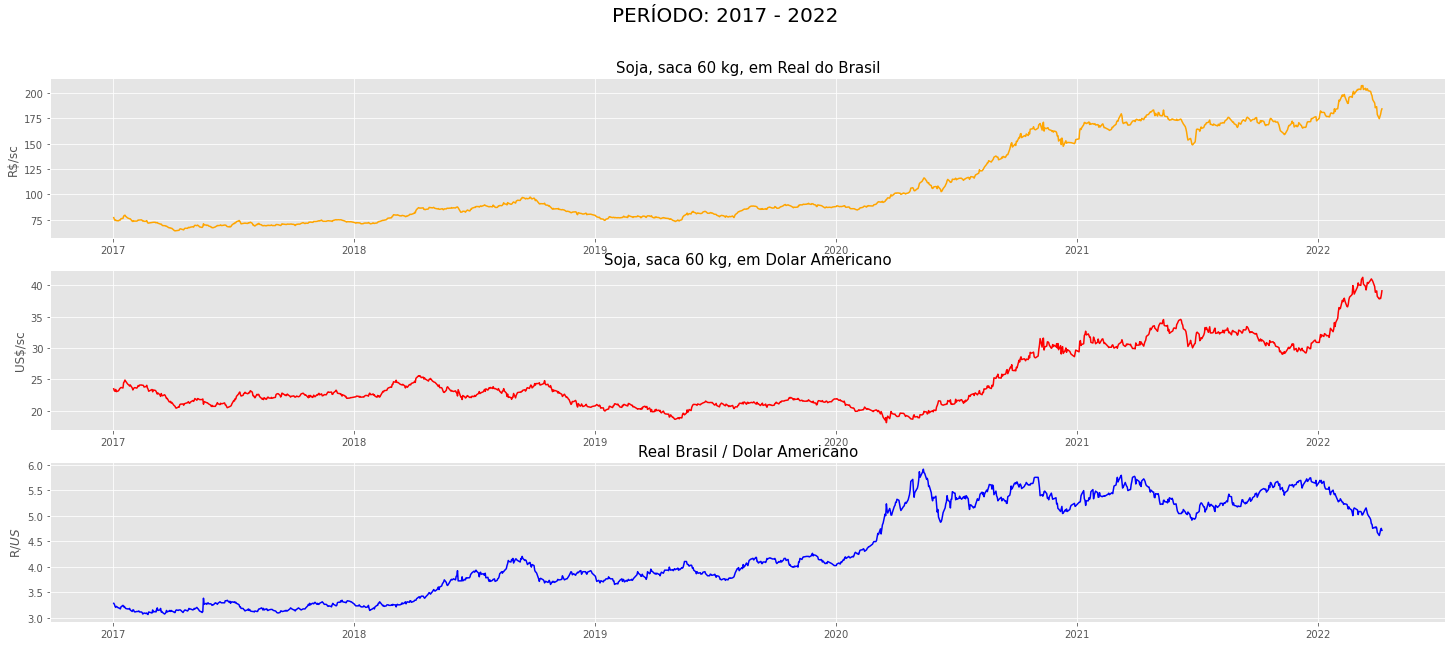

In [ ]:
plt.style.use('ggplot')
fig, axs = plt.subplots(3, 1, figsize=(25, 10))

axs[0].plot(soja_5y['Soja_R$'], color = 'orange')
axs[0].set_title('Soja, saca 60 kg, em Real do Brasil', fontsize = 15)
axs[0].set_ylabel('R$/sc')

axs[1].plot(soja_5y['Soja_US$'], color = 'red')
axs[1].set_title('Soja, saca 60 kg, em Dolar Americano', fontsize = 15)
axs[1].set_ylabel('US$/sc')

axs[2].plot(soja_5y['Dolar_R$'], color = 'blue')
axs[2].set_title('Real Brasil / Dolar Americano', fontsize = 15)
axs[2].set_ylabel('R$/US$')

plt.suptitle('PERÍODO: 2017 - 2022', fontsize = 20)

#plt.savefig('grafico_precos_soja.png', format = 'png')
plt.show()

### 7.2 Gráfico de Correlação
Construiremos uma matriz de correlação para os 3 produtos.

In [ ]:
correl = soja_5y.corr()
mask = np.triu(correl)

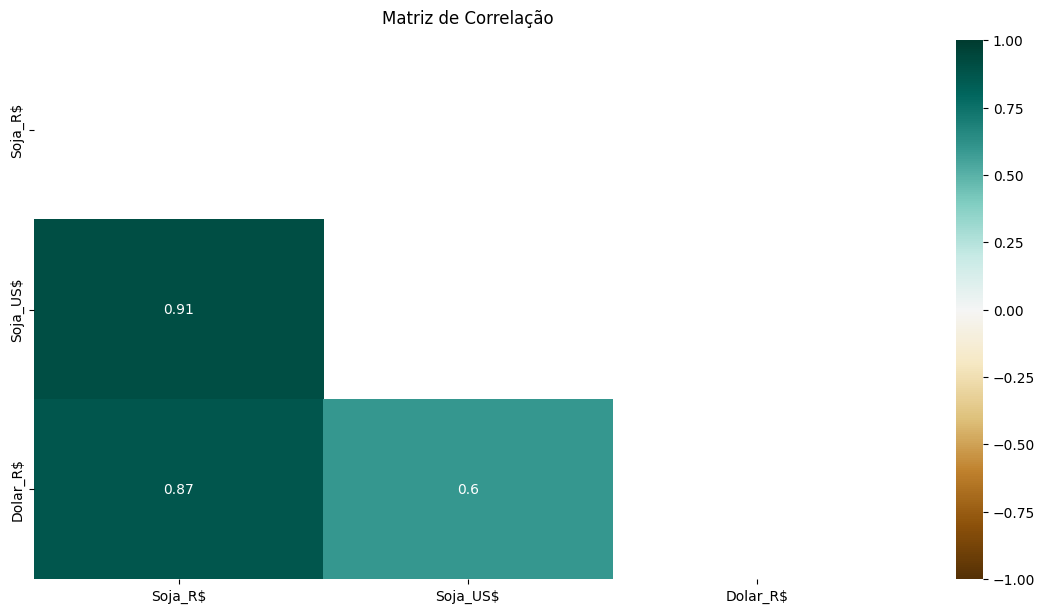

In [ ]:
plt.style.use('default')
plt.figure(figsize = (14, 7))

heatmap = sns.heatmap(correl, vmin = -1, vmax = 1, cmap = 'BrBG', annot = True, mask = mask)
heatmap.set_title('Matriz de Correlação', fontdict = {'fontsize': 12}, pad = 12)

#plt.savefig('matriz_correl.png', format='png')
plt.show()

## 8.Correlação Temporal

In [ ]:
# Definindo a janela temporal:
n = 20

# Limites gráficos para a correlação:
correl_alta = 0.5
correl_baixa = -0.5

In [ ]:
soja_5y['Cor_SoyBRL_Dolar_20P'] = soja_5y['Soja_R$'].rolling(window = n).corr(other = soja_5y['Dolar_R$'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


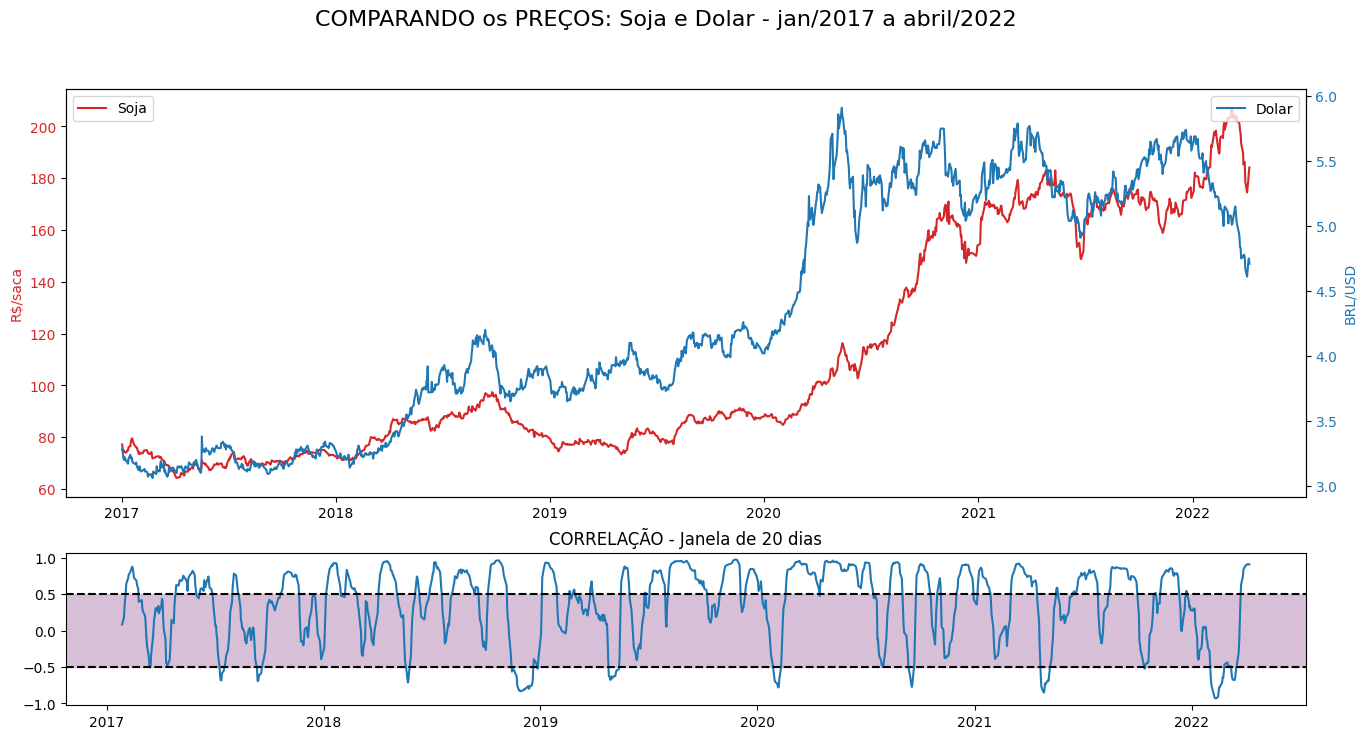

In [ ]:
plt.style.use('default')
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=False, figsize=(16, 8), gridspec_kw={'height_ratios': [4, 1.5]})

color = 'tab:red'
ax1.set_ylabel('R$/saca', color = color)
ax1.plot(soja_5y['Soja_R$'], color = color, label = 'Soja')
ax1.tick_params(axis = 'y', labelcolor = color)
ax1.grid('')
ax1.legend()

ax_twin = ax1.twinx()
color2 = 'tab:blue'
ax_twin.set_ylabel('BRL/USD', color = color2)
ax_twin.plot(soja_5y['Dolar_R$'], color = color2, label = 'Dolar')
ax_twin.tick_params(axis ='y', labelcolor = color2)
ax_twin.grid('')
ax_twin.legend()

ax2.plot(soja_5y['Cor_SoyBRL_Dolar_20P'])
ax2.axhline(y = correl_alta, color = 'black', linestyle = '--')
ax2.axhline(y = correl_baixa, color = 'black', linestyle = '--')

ax2.axhspan(correl_alta, correl_baixa, color = 'thistle')
ax2.grid('')
ax2.set_title('CORRELAÇÃO - Janela de 20 dias')

plt.suptitle('COMPARANDO os PREÇOS: Soja e Dolar - jan/2017 a abril/2022', fontsize = 16)

#plt.savefig('precos_correl.png', format='png')
plt.show()

# CONCLUSÃO
Como podemos observar períodos com alta, baixa e correlação neutra.

Sim, em determinados períodos podemos afirmar que o preço da soja está se movimentando junto ao preço do dólar.